In [1]:
import pandas as pd

In [2]:
titanic_raw = pd.read_csv("titanic_2_aula.csv")

In [4]:
titanic = titanic_raw[["Survived", "Pclass", "Sex", "Fare", "Embarked", "AgeRange"]]

In [7]:
titanic["EmbarkedFillnaMax"] = titanic["Embarked"].fillna("S")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
gender = pd.get_dummies(titanic["Sex"], drop_first=True)

In [9]:
embark_location = pd.get_dummies(titanic["EmbarkedFillnaMax"])

In [12]:
age_range = pd.get_dummies(titanic["AgeRange"])
titanic_concat = pd.concat([titanic, gender, embark_location, age_range], axis=1)

In [13]:
titanic_dmy = titanic_concat.drop(["Embarked", "EmbarkedFillnaMax", "Sex", "AgeRange"], axis=1)

In [30]:
features = ["male", "Pclass"]
x = titanic_dmy[features]

In [15]:
y = titanic_dmy["Survived"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(x, y, test_size = .3, random_state=25) 

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predictions = log_reg.predict(x_teste)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [21]:
pd.crosstab(predictions, y_teste)

Survived,0,1
row_0,,
0,140,36
1,25,67


In [22]:
from sklearn import metrics
metrics.accuracy_score(y_teste, predictions)

0.77238805970149249

In [23]:
## o código acima foi da aula passada (arquivo parte 2 de 24-2-2017)
## apenas estamos 'recuperando' para poder continuar a análise

## Precision e recall

A partir da matriz de confusão podemos calcular algumas taxas

__Precision__ - representa quanto dos elementos julgados como sobreviventes, de fato, sao sobreviventes. mede a taxa de acerto do classificador dentre os valores estimados.

__Recall__ - representa quantos dos reais sobreviventes foram, de fato, classificados como sobreviventes. mede a taxa de acerto do classificador dentre os valores reais.

__F1-Score__ - podemos relacionar o recall e o precision em uma métrica!

In [24]:
print(metrics.classification_report(y_teste, predictions))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       165
          1       0.73      0.65      0.69       103

avg / total       0.77      0.77      0.77       268



In [25]:
# percebe-se acima que o 'f1-score' está sempre com um número entre o de 'precision' e 'recall'

In [26]:
titanic.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,EmbarkedFillnaMax
0,0,3,male,7.2500,S,adulto,S
1,1,1,female,71.2833,C,adulto,C
2,1,3,female,7.9250,S,adulto,S
3,1,1,female,53.1000,S,adulto,S
4,0,3,male,8.0500,S,adulto,S


In [27]:
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa1,AgeFillNa-1,IdadeComMedia,IdadeComMediaSexo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,35.0,35.0


In [28]:
titanic_dmy.head()

,Survived,Pclass,Fare,male,C,Q,S,adolescente,adulto,crianca,idoso,nada
0,0,3,7.2500,1,0,0,1,0,1,0,0,0
1,1,1,71.2833,0,1,0,0,0,1,0,0,0
2,1,3,7.9250,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,0,0,0,1,0,1,0,0,0
4,0,3,8.0500,1,0,0,1,0,1,0,0,0


In [57]:
import seaborn as sns
%matplotlib inline

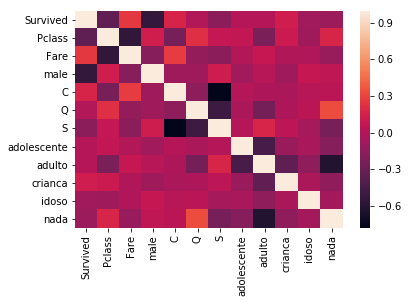

In [81]:
sns.heatmap(titanic_dmy.corr()) 
# esse grafico nos ajuda a tentar identificar correlacoes
# por exemplo, entre 'survived' e 'male'
# entre 'pclass' e 'fare'

In [32]:
titanic.Fare.describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [66]:
def classificar_Fare(linha):
    valor = linha.Fare
    if valor <= 7.910400:
        return "barato"
    elif valor <= 31.000000:
        return "mediano"
    else:
        return "caro"

In [72]:
titanic.loc[0,:] #pego a minha 1a linha, considerando todas as colunas

Survived                  0
Pclass                    3
Sex                    male
Fare                   7.25
Embarked                  S
AgeRange             adulto
EmbarkedFillnaMax         S
Name: 0, dtype: object

In [73]:
classificar_Fare(titanic.loc[0,:])

'barato'

In [74]:
titanic["preco_passagem"] = titanic.apply(classificar_Fare, axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
titanic.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,EmbarkedFillnaMax,preco_passagem
0,0,3,male,7.2500,S,adulto,S,barato
1,1,1,female,71.2833,C,adulto,C,caro
2,1,3,female,7.9250,S,adulto,S,mediano
3,1,1,female,53.1000,S,adulto,S,caro
4,0,3,male,8.0500,S,adulto,S,mediano


In [76]:
classificador_preco_passagem = pd.get_dummies(titanic["preco_passagem"]) #transformamos para categóricos binários
classificador_preco_passagem.head()

,barato,caro,mediano
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [78]:
titanic_dmy.head()

,Survived,Pclass,Fare,male,C,Q,S,adolescente,adulto,crianca,idoso,nada
0,0,3,7.2500,1,0,0,1,0,1,0,0,0
1,1,1,71.2833,0,1,0,0,0,1,0,0,0
2,1,3,7.9250,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,0,0,0,1,0,1,0,0,0
4,0,3,8.0500,1,0,0,1,0,1,0,0,0


In [79]:
titanic_concatenado = pd.concat([titanic_dmy, classificador_preco_passagem], axis=1)
titanic_concatenado.head()

,Survived,Pclass,Fare,male,C,Q,S,adolescente,adulto,crianca,idoso,nada,barato,caro,mediano
0,0,3,7.2500,1,0,0,1,0,1,0,0,0,1,0,0
1,1,1,71.2833,0,1,0,0,0,1,0,0,0,0,1,0
2,1,3,7.9250,0,0,0,1,0,1,0,0,0,0,0,1
3,1,1,53.1000,0,0,0,1,0,1,0,0,0,0,1,0
4,0,3,8.0500,1,0,0,1,0,1,0,0,0,0,0,1


In [80]:
titanic_concatenado_final = titanic_concatenado.drop(["Fare"], axis=1)
titanic_concatenado_final.head(10)

,Survived,Pclass,male,C,Q,S,adolescente,adulto,crianca,idoso,nada,barato,caro,mediano
0,0,3,1,0,0,1,0,1,0,0,0,1,0,0
1,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1,3,0,0,0,1,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,3,1,0,0,1,0,1,0,0,0,0,0,1
5,0,3,1,0,1,0,0,0,0,0,1,0,0,1
6,0,1,1,0,0,1,0,1,0,0,0,0,1,0
7,0,3,1,0,0,1,0,0,1,0,0,0,0,1
8,1,3,0,0,0,1,0,1,0,0,0,0,0,1
9,1,2,0,1,0,0,1,0,0,0,0,0,0,1


In [82]:
features = ["male", "C", "Q", "C", "adolescente", "adulto", "crianca", "idoso", "barato", "caro", "mediano"]
x = titanic_concatenado_final[features]
y = titanic_concatenado_final["Survived"]

In [83]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(x, y, test_size = .3, random_state=25) 

In [84]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions = log_reg.predict(x_teste)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [86]:
pd.crosstab(predictions, y_teste)

Survived,0,1
row_0,,
0,140,35
1,25,68


In [87]:
metrics.accuracy_score(y_teste, predictions)

0.77611940298507465

In [88]:
# na 1a vez que fizemos, o ACC (accuracy_score) foi de 0.772.
# agora, é de 0.776.

## Que tal usarmos um método para descobrirmos as melhores features?
### Recursive Feature Elimination (RFE)

In [100]:
from sklearn.feature_selection import RFECV

In [132]:
x = titanic_dmy.drop(["Survived"], axis=1)
y = titanic_dmy["Survived"]

rfecv = RFECV(estimator=LogisticRegression(), cv=10)
rfecv.fit(x, y)

print("Numero otimo de features: %d" % rfecv.n_features_)
print("Melhor conjunto de features: %s" % list(x.columns[rfecv.support_]))

Numero otimo de features: 4
Melhor conjunto de features: ['Pclass', 'male', 'crianca', 'idoso']


In [105]:
#Eu tinha 11 features, e o algoritmo me recomendou quatro

In [106]:
#Quanto mais features, mais o algoritmo demora para treinar.

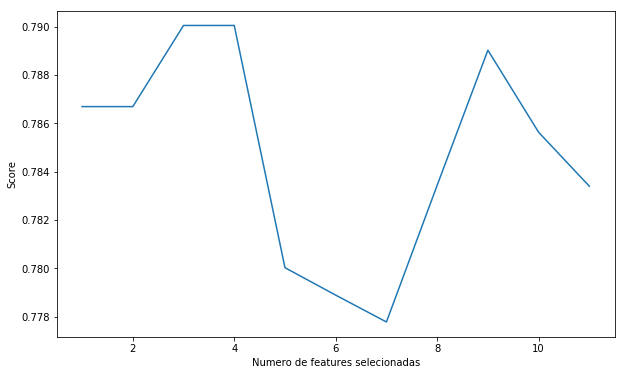

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xlabel("Numero de features selecionadas")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [108]:
features = ["C", "Q", "C", "male", "adolescente", "crianca", "idoso"]
x = titanic_dmy[features]
y = titanic_dmy["Survived"]

In [109]:
x_treino, x_teste, y_treino, y_teste = \
    train_test_split(x, y, test_size = .3, random_state=25) 

In [110]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
predictions = log_reg.predict(x_teste)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [112]:
pd.crosstab(predictions, y_teste)

Survived,0,1
row_0,,
0,140,35
1,25,68


In [113]:
metrics.accuracy_score(y_teste, predictions)

0.77611940298507465

## Cross Validation / Validacao cruzada


In [133]:
# algo que eu nao copiei

In [152]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(LogisticRegression(random_state=42),
                           x, y, cv=10)
mean_accuracy = sum(accuracy)/len(accuracy)

In [153]:
print("""Scores: {}
Mean: {}""".format(accuracy, mean_accuracy))

Scores: [ 0.77777778  0.76666667  0.7752809   0.83146067  0.78651685  0.79775281
  0.76404494  0.74157303  0.82022472  0.77272727]
Mean: 0.7834025649755986


In [154]:
# https://www.kaggle.com/c/titanic/